# Support Vector Machines
# Aditya Bagad

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

### Dataset Description

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

### Reading the dataset

In [2]:
dataFrame = pd.read_csv('cell_samples.csv')

In [3]:
dataFrame.shape

(699, 11)

In [4]:
dataFrame.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


- The ID field contains the patient identifiers. 
- The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

- The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

### Distribution of the classes based on Clump thickness and Uniformity of cell size:

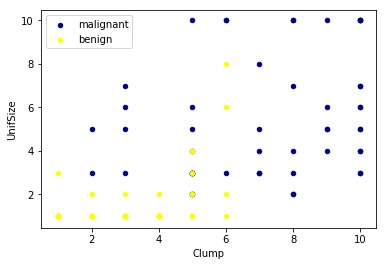

In [5]:
ax = dataFrame[dataFrame['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')

dataFrame[dataFrame['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)

plt.show()

### Data pre-processing and selection

In [6]:
dataFrame.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

- __BareNuc__ column includes some values that are not numerical. We can drop those rows

In [7]:
dataFrame = dataFrame[pd.to_numeric(dataFrame['BareNuc'], errors='coerce').notnull()]

dataFrame['BareNuc'] = dataFrame['BareNuc'].astype('int64')

In [8]:
dataFrame.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### Splitting into Features and Labels

#### Features

In [9]:
X = dataFrame.iloc[:, 1:-1]
X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [10]:
X = np.asarray(X)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

#### Labels

In [11]:
y = dataFrame.iloc[:, -1]
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [12]:
y = np.asarray(y)
y[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

### Splitting into Training and Testing set

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [14]:
X_train.shape,  X_test.shape

((546, 9), (137, 9))

In [15]:
y_train.shape,  y_test.shape

((546,), (137,))

### Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1. Linear
    2. Polynomial
    3. Radial basis function (RBF)
    4. Sigmoid

In [16]:
svm = svm.SVC(kernel='rbf', gamma='auto')

In [17]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predictions

In [18]:
y_pred = svm.predict(X_test)
y_pred[0:5]

array([2, 4, 2, 4, 2], dtype=int64)

### Evaluation

### 1. Accuracy

In [19]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print('SVM Accuracy : ', accuracy)

SVM Accuracy :  0.9635036496350365


### 2. Jaccard Index

In [20]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, y_pred)

0.9635036496350365

### 3. Confusion Matrix

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

- __F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[85  5]
 [ 0 47]]


#### Visualize the Confusion Matrix

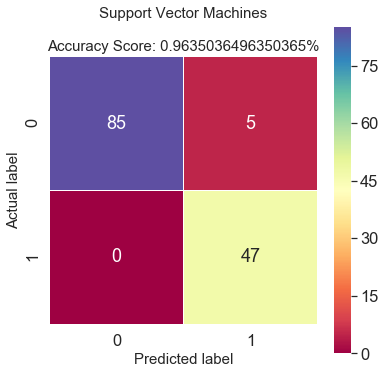

In [24]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', linewidths=.5, square = True, cmap = 'Spectral')

plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)

algo_title='Support Vector Machines'
all_sample_title = algo_title + '\n\n' + 'Accuracy Score: {0}%'.format(accuracy)
plt.title(all_sample_title, size = 15)

plt.show()